### ESERCIZIO 2 CON PLOT

In [89]:
import numpy as np
import pandas as pd

#### PUNTO 1 e 2

In [90]:
data=pd.read_csv(r"C:\Users\Alice\Desktop\Person_Gender_Height_Weight_Index.csv")
print("DATAFRAME DI PARTENZA:\n", data)

DATAFRAME DI PARTENZA:
      Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]


In [91]:
#creare un nuovo dataset bmi_ds
bmi_ds=pd.DataFrame(data= data,columns=["Gender", "Height", "Weight"])
bmi_ds
print("DATAFRAME CON LE COLONNE SELEZIONATE:\n", bmi_ds)

DATAFRAME CON LE COLONNE SELEZIONATE:
      Gender  Height  Weight
0      Male     174      96
1      Male     189      87
2    Female     185     110
3    Female     195     104
4      Male     149      61
..      ...     ...     ...
495  Female     150     153
496  Female     184     121
497  Female     141     136
498    Male     150      95
499    Male     173     131

[500 rows x 3 columns]


In [92]:
#creo la colonna con indice di massa cororrea BMI 
#BMI=peso (in kg.)/(altezza (in m.)**2
BMI=data.iloc[:,2]/(data.iloc[:,1]/100)**2
BMI

0      31.708284
1      24.355421
2      32.140248
3      27.350427
4      27.476240
         ...    
495    68.000000
496    35.739603
497    68.407022
498    42.222222
499    43.770256
Length: 500, dtype: float64

In [93]:
#aggiungo la colonna BMI al dataset
bmi_ds["BMI"]=BMI
bmi_ds

,Gender,Height,Weight,BMI
0,Male,174,96,31.708284
1,Male,189,87,24.355421
2,Female,185,110,32.140248
3,Female,195,104,27.350427
4,Male,149,61,27.476240
...,...,...,...,...
495,Female,150,153,68.000000
496,Female,184,121,35.739603
497,Female,141,136,68.407022
498,Male,150,95,42.222222


In [94]:
print("DATAFRAME TRASFORMATO IN CSV:\n")
Es2_BMI= bmi_ds.to_csv()

DATAFRAME TRASFORMATO IN CSV:



#### PUNTO 3

#### VISUALIZZAZIONE

In [95]:
%matplotlib inline
import matplotlib as plt
import seaborn; seaborn.set()
import seaborn as sns

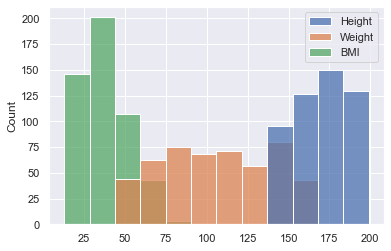

In [96]:
seaborn.histplot(data=bmi_ds)

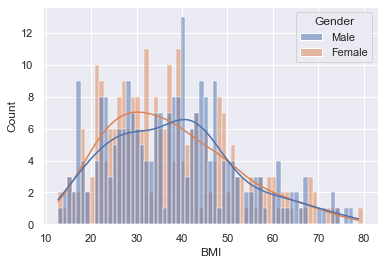

In [97]:
seaborn.histplot(data=bmi_ds, x="BMI", hue="Gender", bins=300, binwidth=1, kde="true")

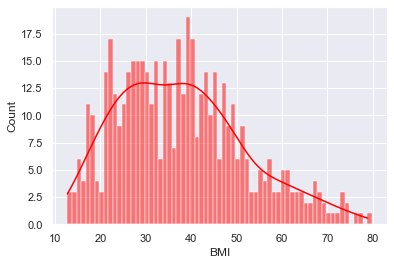

In [98]:
seaborn.histplot(data=bmi_ds, x="BMI", bins=300, binwidth=1, kde="true", color="red")

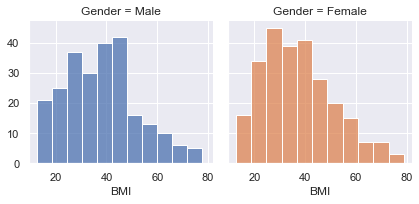

In [99]:
# gli chiedo di farmi dei facet con maschi e femmine, 
# metto "col" di colonna così me li mette di fianco 
#(con row me li metteva uno sopra e uno sotto)
g=seaborn.FacetGrid(bmi_ds, col="Gender", hue="Gender")
#serve per far apparire il graico nella griglia, 
# praticamente va ad associare il risultato del grafico creato
# alla griglia dividendoli per gender
g.map(sns.histplot, "BMI")
# metto le etichette
g.set_axis_labels("BMI")

#### COME CAMBIA IL BMI AL VARIARE DELL'ALTEZZA


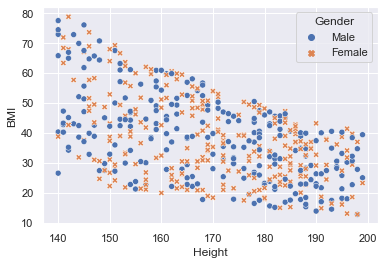

In [100]:
sns.scatterplot(data=bmi_ds, y="BMI", x="Height", hue="Gender", style="Gender")

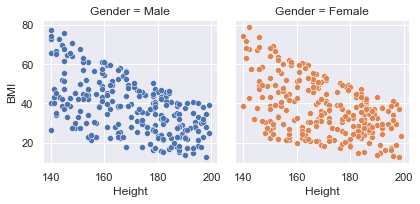

In [101]:
h=sns.FacetGrid(data=bmi_ds, col="Gender", hue="Gender")
h.map(sns.scatterplot, "Height", "BMI")

C:\Users\Alice\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alice\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alice\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


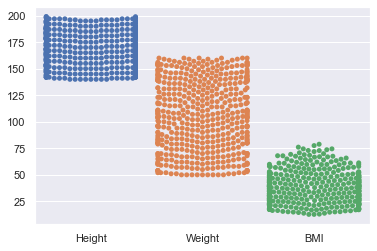

In [102]:
sns.swarmplot(data=bmi_ds)

#### COME VARIA IL PESO AL VARIARE DEL BMI

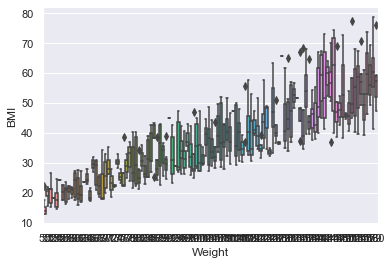

In [107]:
m=sns.boxplot(data=bmi_ds, y="BMI", x="Weight")#, hue="Gender")

In [111]:
m.cut(Weight, 5)
m.qcut(Weight, 5)

AttributeError: 'AxesSubplot' object has no attribute 'cut'

### PUNTO 8

In [106]:
bmi_ds
obesità=bmi_ds.loc[(bmi_ds["BMI"]>30)]
print("OBESITA':\n", obesità)
sovrappeso=bmi_ds.loc[(bmi_ds["BMI"]>25)&(bmi_ds["BMI"]<=30)]
print("SOVRAPPESO:\n", sovrappeso)
ob_sovr=bmi_ds.loc[(bmi_ds["BMI"]>25)]
print("OBESITA_SOVRAPPESO:\n", ob_sovr)
regolare=bmi_ds.loc[(bmi_ds["BMI"]>18.50)&(bmi_ds["BMI"]<=25)]
print("REGOLARE:\n", regolare)
sottopeso=bmi_ds.loc[(bmi_ds["BMI"]>16)&(bmi_ds["BMI"]<=18.50)]
print("SOTTOPESO:\n", sottopeso)
inedia=bmi_ds.loc[bmi_ds["BMI"]<=16]
print("INEDIA:\n", inedia)
sot_ined=bmi_ds.loc[(bmi_ds["BMI"]<=18.50)]
print("SOTTOPESO_INEDIA:\n", sot_ined)

OBESITA':
      Gender  Height  Weight        BMI
0      Male     174      96  31.708284
2    Female     185     110  32.140248
6      Male     147      92  42.574853
7      Male     154     111  46.803846
9    Female     169     103  36.063163
..      ...     ...     ...        ...
495  Female     150     153  68.000000
496  Female     184     121  35.739603
497  Female     141     136  68.407022
498    Male     150      95  42.222222
499    Male     173     131  43.770256

[332 rows x 4 columns]
SOVRAPPESO:
      Gender  Height  Weight        BMI
3    Female     195     104  27.350427
4      Male     149      61  27.476240
5      Male     189     104  29.114526
8      Male     174      90  29.726516
12   Female     192     101  27.398003
..      ...     ...     ...        ...
400  Female     195     104  27.350427
457  Female     175      83  27.102041
466  Female     188      99  28.010412
469    Male     198     109  27.803285
474  Female     167      79  28.326580

[68 rows x 4 co

### Mostrare come il peso varia al variare dell'altezza per coloro che sono obesi o in sovrappeso

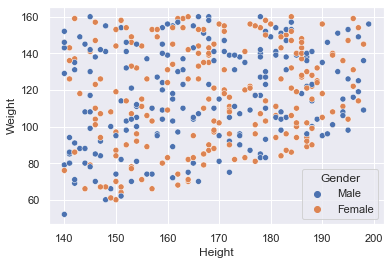

In [71]:
seaborn.scatterplot(data=ob_sovr, y="Weight", x="Height", hue="Gender")

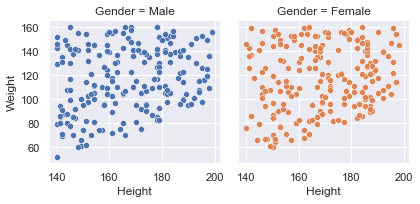

In [77]:
s=sns.FacetGrid(data=ob_sovr, col="Gender", hue="Gender")
s.map(sns.scatterplot, "Height", "Weight")

### Mostrare i parametri altezza, peso e BMI per coloro che sono OBESI O SOVRAPPESO

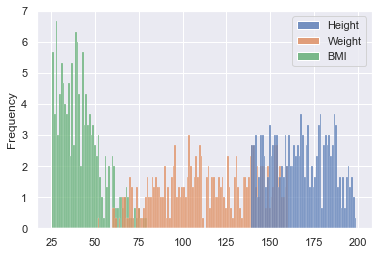

In [78]:
sns.histplot(data=ob_sovr, bins=80, binwidth=1, stat="frequency")

### Mostrare come il peso varia al variare dell'altezza per coloro che sono SOTTOPESO, INEDIA

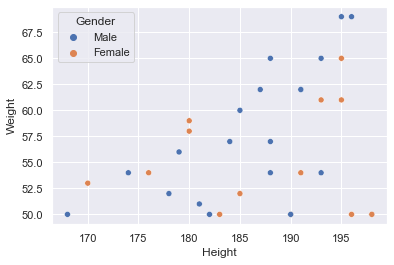

In [79]:
sns.scatterplot(data=sot_ined, x="Height", y="Weight", hue="Gender")

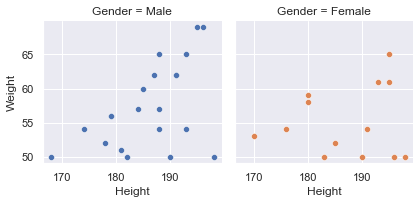

In [81]:
c=sns.FacetGrid(data=sot_ined, col="Gender", hue="Gender")
c.map(sns.scatterplot, "Height", "Weight")

### Mostrare i parametri altezza, peso e BMI per coloro che sono sottopeso, inedia

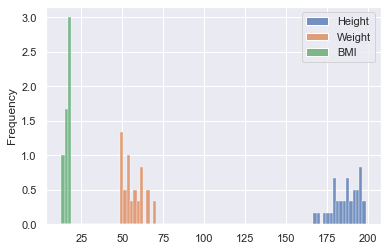

In [87]:
sns.histplot(data=sot_ined, bins=80, binwidth=2, stat="frequency")